In [371]:

# import nltk
# nltk.download('stopwords')

In [407]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [373]:
df=pd.read_csv('Datasets\\senimental analysis.csv',encoding='latin1')


In [374]:
def Preprcessing(text):
    text=text.lower()
    text=re.sub(f"[{string.punctuation}]","",text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text
df["cleaned_review"]=df["text"].astype(str).apply(Preprcessing)

In [375]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_review
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely skyscr...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,httptwitpiccom4w75p like


In [376]:
print(df.columns)
print(df.isnull().sum())
print(df.shape)
print(df['sentiment'].value_counts())

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)',
       'cleaned_review'],
      dtype='object')
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
cleaned_review         0
dtype: int64
(4815, 10)
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

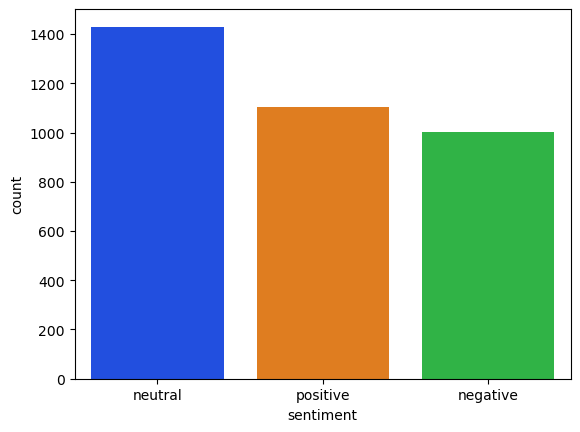

In [377]:
sns.countplot(x="sentiment", data=df, palette="bright", hue="sentiment", legend=False)

In [378]:
df = df.dropna(axis=0)

In [379]:
lb=LabelEncoder()
df['sentiment']=lb.fit_transform(df['sentiment'])
x=df['cleaned_review']
y=df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)
print(df['sentiment'].value_counts())

sentiment
1    1430
2    1103
0    1001
Name: count, dtype: int64


In [380]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_tfidf, y_train)


In [397]:
model=LogisticRegression()
# model=MultinomialNB()
# model=RandomForestClassifier(n_estimators=40,random_state=42)
model.fit(x_resampled, y_resampled)
y_pred=model.predict(x_test_tfidf)

In [399]:
acc=accuracy_score(y_test,y_pred)
print(acc)
print(y_test.value_counts())
y_pred1=pd.DataFrame(y_pred)
print(y_pred1.value_counts())

0.6449787835926449
sentiment
1    286
2    214
0    207
Name: count, dtype: int64
0
1    309
2    207
0    191
Name: count, dtype: int64


[[123  67  17]
 [ 53 188  45]
 [ 15  54 145]]


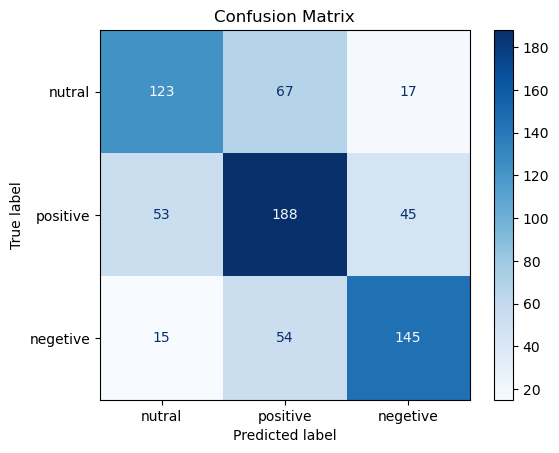

In [409]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["nutral","positive","negetive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [421]:
a=vectorizer.transform([input("Paste Review")])
pred=model.predict(a)

if pred==[0]:
    print("Negative!")
elif pred==[1]:
    print("nutral!")
elif pred==[2]:
    print("positive!")

Paste Review Paste Review very bad product


Negative
